In [166]:
import pandas as pd
import re

def convert_latency(x):
    const = {
        's' : 1,
        'm' : 60,
        'h' : 3600,
        'd' : 24*3600,
    }
    regex = "\d*"
    return int(re.search(regex, x).group(0)) * const[x[-1]]

def min_latency(index, row):
    _temp = [
        row['latency1'],
        row['latency2'], 
        row['latency3'], 
        row['latency4'], 
        row['latency5'], 
        row['latency6'], 
    ]

    _temp = [item for item in _temp if str(item) != 'nan']

    try:
        return convert_latency(min(_temp))
    except:
        print(f"Error {_temp}")
        raise Exception('Error ')
          

def compile_to_csv(name,dataframe):
    result = {
        'time': [],
        'latency' : []
    }
    for index, row in dataframe.iterrows():
        latency = min_latency(index, row)
        result['time'].append(row['time']) 
        result['latency'].append(latency)

    result = pd.DataFrame(data=result)
    result = result.set_index('time')
    result.to_csv(f'./data/{name}-1.csv')
    print(f'./data/{name} finish')


In [171]:
sites = ['arkpi.csv', 'baki.csv', 'bdcm.csv', 'cgji.csv', 'tngi.csv', 'yogi.csv']

for site in sites:
    name = site[:-4]
    df = pd.read_csv(site)
    compile_to_csv(name, df)

./data/arkpi finish
./data/baki finish
./data/bdcm finish
./data/cgji finish
./data/tngi finish
./data/yogi finish


In [204]:
# Visualiasi Data

df = pd.read_csv('./data/arkpi-1.csv', parse_dates=['time'])
df['time'] = df['time'].dt.floor('min')
df = df.set_index('time')
df = df.resample("5min", label="right", closed='right').mean()
df.describe()

,latency
count,502.000000
mean,22.192198
std,113.534540
min,2.600000
25%,3.600000
50%,4.800000
75%,6.600000
max,1080.000000


In [349]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_theme()

def convert_to_df(name, sample):
    df = pd.read_csv(f'./data/{name}', parse_dates=['time'])
    df['time'] = df['time'].dt.floor('min')
    df = df.set_index('time')
    df = df.resample(sample, label="right", closed='right').mean()
    describe = df.describe()
    df = df.drop(df[df['latency']>describe.loc['mean', 'latency']+describe.loc['75%', "latency"]].index)
    if name == 'yogi-1.csv':
        df['latency'] = df['latency']/3600
    return df

def plot_graph(df, name, c):
    fig = plt.figure()
    ax = fig.add_subplot()
    if name == 'YOGI':
        ax.set_ylabel('Time (Hour)')
    else:
        ax.set_ylabel('Time (Second)')
    ax.set_xlabel('Timestamp')
    ax.tick_params(axis='x', rotation=-30)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%h %H:%M'))
    ax.set_title(f"Graph of {name}")
    
    ax.plot(df.index, df['latency'], c, label="Data Latency")
    

   
    ax.legend()
    plt.show()

def plot_bar(title, avg):
    bar_labels = ['red', 'blue', '_red', 'orange', 'green']
    bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']

    plt.bar_label(plt.bar(title, avg, label=bar_labels, color=bar_colors), padding=1)
    plt.title('Mean of Data Latency')
    plt.ylabel('Time (second)')
    plt.show()

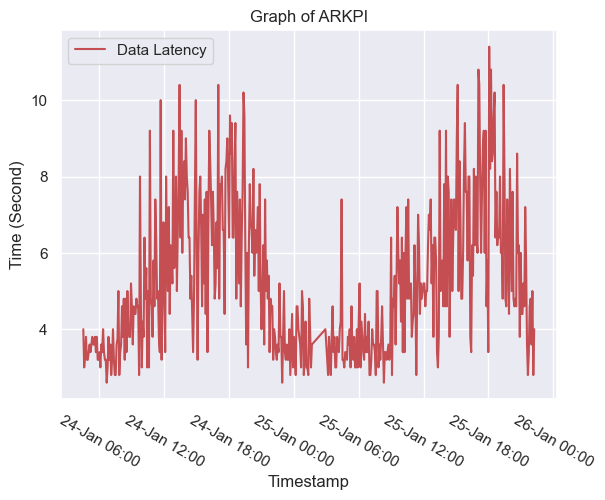

          latency
count  488.000000
mean     5.234187
std      1.947428
min      2.600000
25%      3.600000
50%      4.800000
75%      6.400000
max     11.400000


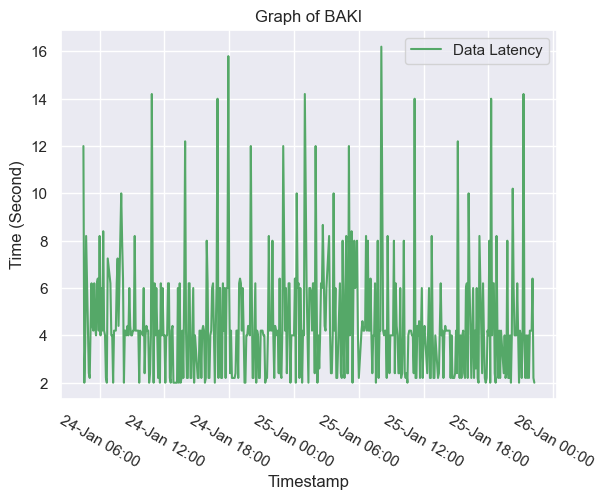

          latency
count  470.000000
mean     4.484752
std      2.433233
min      2.000000
25%      2.400000
50%      4.200000
75%      6.000000
max     16.200000


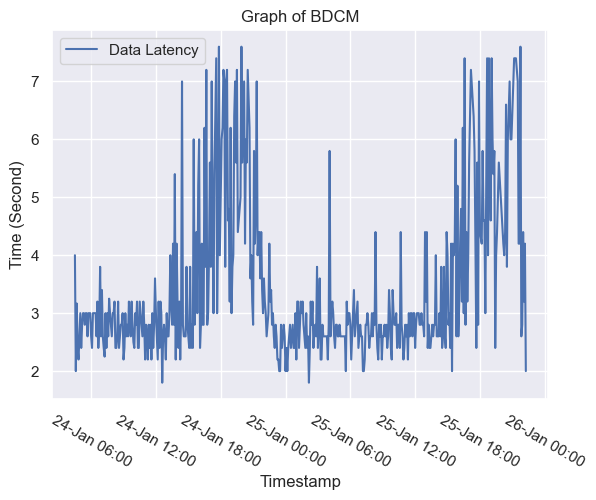

          latency
count  481.000000
mean     3.399965
std      1.326595
min      1.800000
25%      2.600000
50%      2.800000
75%      3.800000
max      7.600000


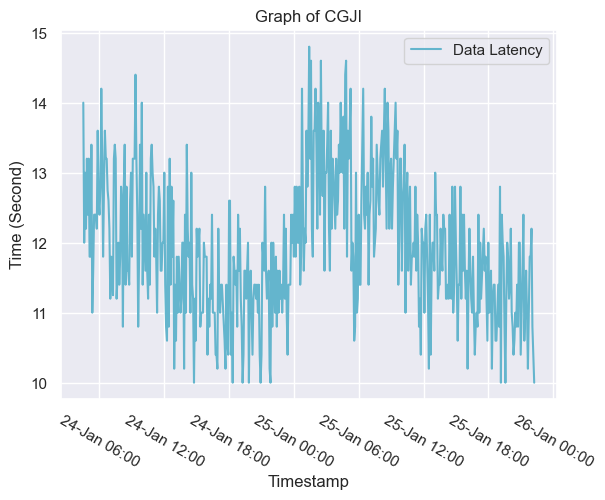

          latency
count  498.000000
mean    11.949732
std      0.996978
min     10.000000
25%     11.200000
50%     11.800000
75%     12.600000
max     14.800000


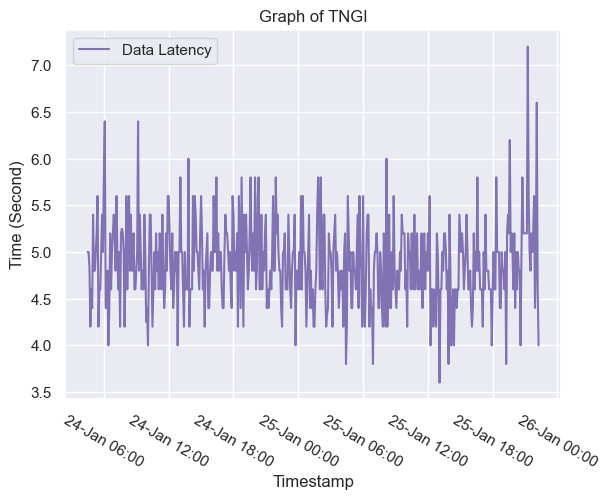

          latency
count  502.000000
mean     4.877822
std      0.455097
min      3.600000
25%      4.600000
50%      4.800000
75%      5.200000
max      7.200000


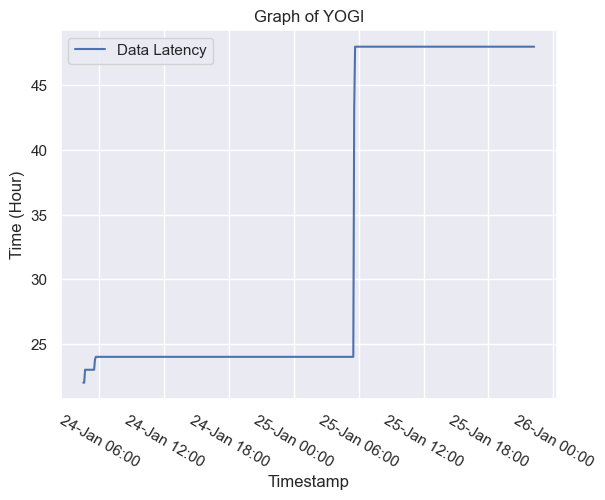

          latency
count  502.000000
mean    33.569721
std     11.787772
min     22.000000
25%     24.000000
50%     24.000000
75%     48.000000
max     48.000000


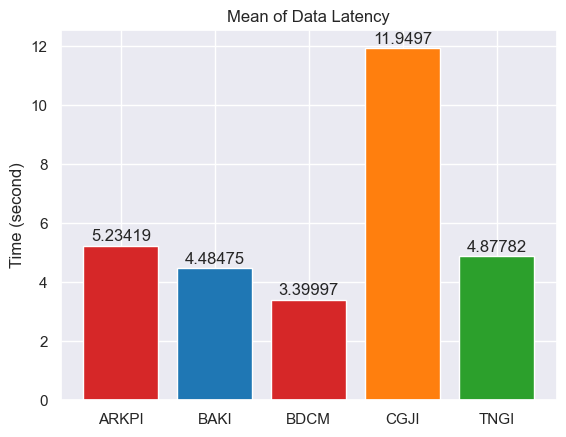

In [357]:
sites_1 = ['arkpi-1.csv', 'baki-1.csv', 'bdcm-1.csv', 'cgji-1.csv', 'tngi-1.csv', 'yogi-1.csv']

title = ['ARKPI', 'BAKI', 'BDCM', 'CGJI', 'TNGI', 'YOGI']
bar_title = ['ARKPI', 'BAKI', 'BDCM', 'CGJI', 'TNGI']

avg = []
i = 0

color = ['r', 'g', 'b', 'c', 'm', 'b']

for item in sites_1:
    df = convert_to_df(item, '5min')
    plot_graph(df, title[i], color[i])
    df_describe = df.describe()
    print(df_describe)
    if item != 'yogi-1.csv':
        avg.append(df_describe.iloc[1,0])
    i+=1

plot_bar(bar_title, avg)

    
    
